
TFG

Este es el codigo del tfg de Borja Jimeno

En esta primera celda vamos a definir todas las funciones y variables que necesitaremos para calcular el ritmo teórico. Cada función está explicada al inicio y cada variable tiene asociadas sus unidades en un comentario a la derecha.  

Para la realización de las funciones se ha tomado como referencia:  
-El pdf ('rateTutorial_MMartinez_TAE25.pdf)    
-El capítulo 7 de la Tesis de María ('tesisMaria_chap7.pdf')   
-El artículo 'Inelastic and Elastic Scattering of 187-Mev Electrons from Selected Even-Even Nuclei - Richard Helm - PHISICAL REVIEW VOLUME 104, NUMBER 5 DECEMBER 1, 1956'  
-Para calcular el Quenching Factor, Sección 4.3.2 de la tesis de Tamara Pardo Yanguas ('Tesis-Tamara.pdf')

In [10]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
from scipy import special
from scipy.stats import norm

from funciones_ritmo_teorico import*
from funciones_ritmo_exp import*

plt.rcParams['font.size'] = 18

In [11]:
array_detectores=np.loadtxt("Datos/array_detectores.txt",delimiter=";")
array_minimos=np.loadtxt("Datos/array_minimos_detectores.txt",delimiter=";")

array_minimos2=array_minimos*1e43

ordenado=np.argsort(array_minimos2)

array_minimos=array_minimos[ordenado]
array_detectores=array_detectores[ordenado]

array_detectores

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [32]:
numero_detectores=array_minimos
for i in range(len(numero_detectores)):
    aux=0
    for j in range (9):
        aux+=array_detectores[i][j]
    numero_detectores[i]=aux
print(numero_detectores)

numeros=np.zeros(10,dtype=int)
for i in range (10):
    for j in range(len(numero_detectores)):
        if numero_detectores[j]==i:
            numeros[i]+=1
numeros

datos_1detector=np.zeros((numeros[1],10))
datos_2detector=np.zeros((numeros[2],10))
datos_3detector=np.zeros((numeros[3],10))
datos_4detector=np.zeros((numeros[4],10))
datos_5detector=np.zeros((numeros[5],10))
datos_6detector=np.zeros((numeros[6],10))
datos_7detector=np.zeros((numeros[7],10))
datos_8detector=np.zeros((numeros[8],10))
datos_9detector=np.zeros((numeros[9],10))




numeros

[1. 1. 1. 1. 1. 1. 1. 2. 2. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 2. 3. 3. 2. 2. 3. 3. 3. 2. 2. 3. 3.
 3. 2. 2. 3. 3. 3. 3. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 2. 3. 3. 3. 3. 3. 3. 3. 3. 4. 3. 3. 3. 3. 3. 3. 3.
 3. 4. 3. 3. 3. 3. 3. 3. 4. 4. 4. 3. 3. 3. 3. 3. 3. 4. 4. 3. 4. 3. 3. 3.
 3. 3. 4. 4. 4. 3. 3. 4. 4. 3. 4. 3. 4. 4. 4. 3. 4. 3. 4. 3. 4. 4. 4. 3.
 3. 4. 4. 4. 4. 4. 4. 4. 3. 4. 3. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4.
 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 3. 4. 4. 4. 4. 4. 4. 4. 4. 5. 3. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 4. 4. 4. 5. 4. 4. 4. 4. 4. 5.
 4. 4. 4. 4. 4. 4. 5. 5. 4. 5. 4. 4. 4. 4. 4. 5. 4. 5. 4. 5. 4. 4. 4. 4.
 4. 4. 4. 5. 5. 5. 4. 4. 5. 4. 5. 4. 5. 5. 5. 4. 4. 4. 5. 4. 5. 4. 5. 5.
 4. 4. 4. 5. 5. 5. 5. 5. 5. 5. 4. 5. 4. 5. 4. 5. 5. 5. 5. 5. 4. 5. 4. 4.
 5. 5. 5. 5. 5. 5. 4. 5. 5. 5. 5. 5. 4. 5. 5. 5. 5. 5. 5. 5. 5. 4. 5. 5.
 5. 5. 5. 5. 5. 5. 5. 6. 4. 5. 5. 5. 5. 5. 5. 5. 5.

array([  0,   9,  36,  84, 126, 126,  84,  36,   9,   1])

In [46]:
i1=0
i2=0
i3=0
i4=0
i5=0
i6=0
i7=0
i8=0
i9=0

for i in range (len(numero_detectores)):
    if numero_detectores[i]==1:
        for j in range(9):
            datos_1detector[i1,j]=array_detectores[i,j]
        datos_1detector[i1,9]=array_minimos[i]
        i1+=1
    
    if numero_detectores[i]==2:
        for j in range(9):
            datos_2detector[i2,j]=array_detectores[i,j]
        datos_2detector[i2,9]=array_minimos[i]
        i2+=1
         
    if numero_detectores[i]==3:
        for j in range(9):
            datos_3detector[i3,j]=array_detectores[i,j]
        datos_3detector[i3,9]=array_minimos[i]
        i3+=1

    if numero_detectores[i]==4:
        for j in range(9):
            datos_4detector[i4,j]=array_detectores[i,j]
        datos_4detector[i4,9]=array_minimos[i]
        i4+=1
         
    if numero_detectores[i]==5:
        for j in range(9):
            datos_5detector[i5,j]=array_detectores[i,j]
        datos_5detector[i5,9]=array_minimos[i]
        i5+=1

    if numero_detectores[i]==6:
        for j in range(9):
            datos_6detector[i6,j]=array_detectores[i,j]
        datos_6detector[i6,9]=array_minimos[i]
        i6+=1
         
    if numero_detectores[i]==7:
        for j in range(9):
            datos_7detector[i7,j]=array_detectores[i,j]
        datos_7detector[i7,9]=array_minimos[i]
        i7+=1

    if numero_detectores[i]==8:
        for j in range(9):
            datos_8detector[i8,j]=array_detectores[i,j]
        datos_8detector[i8,9]=array_minimos[i]
        i8+=1
        
    if numero_detectores[i]==9:
        for j in range(9):
            datos_9detector[i9,j]=array_detectores[i,j]
        datos_9detector[i9,9]=array_minimos[i]
        i9+=1
        

datos_1detector
datos_2detector
datos_3detector
datos_4detector
datos_5detector
datos_6detector
datos_7detector
datos_8detector
datos_9detector


[0. 0. 0. 0. 0. 0. 0. 0. 1.]
[0. 0. 0. 0. 0. 0. 0. 1. 1.]
[0. 0. 1. 0. 0. 0. 0. 1. 1.]
[0. 0. 1. 0. 0. 0. 1. 1. 1.]


/tmp/ipykernel_43081/2354700610.py:28: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
/tmp/ipykernel_43081/2354700610.py:38: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
/tmp/ipykernel_43081/2354700610.py:48: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
/tmp/ipykernel_43081/2354700610.py:59: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis1=np.array([(ritmo_comp1/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


[0. 0. 1. 0. 1. 0. 1. 1. 1.]


/tmp/ipykernel_43081/2354700610.py:70: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


[0. 0. 1. 0. 1. 1. 1. 1. 1.]


/tmp/ipykernel_43081/2354700610.py:80: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


[0. 0. 1. 1. 1. 1. 1. 1. 1.]


/tmp/ipykernel_43081/2354700610.py:90: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


[0. 1. 1. 1. 1. 1. 1. 1. 1.]


/tmp/ipykernel_43081/2354700610.py:100: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


[1. 1. 1. 1. 1. 1. 1. 1. 1.]


/tmp/ipykernel_43081/2354700610.py:110: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


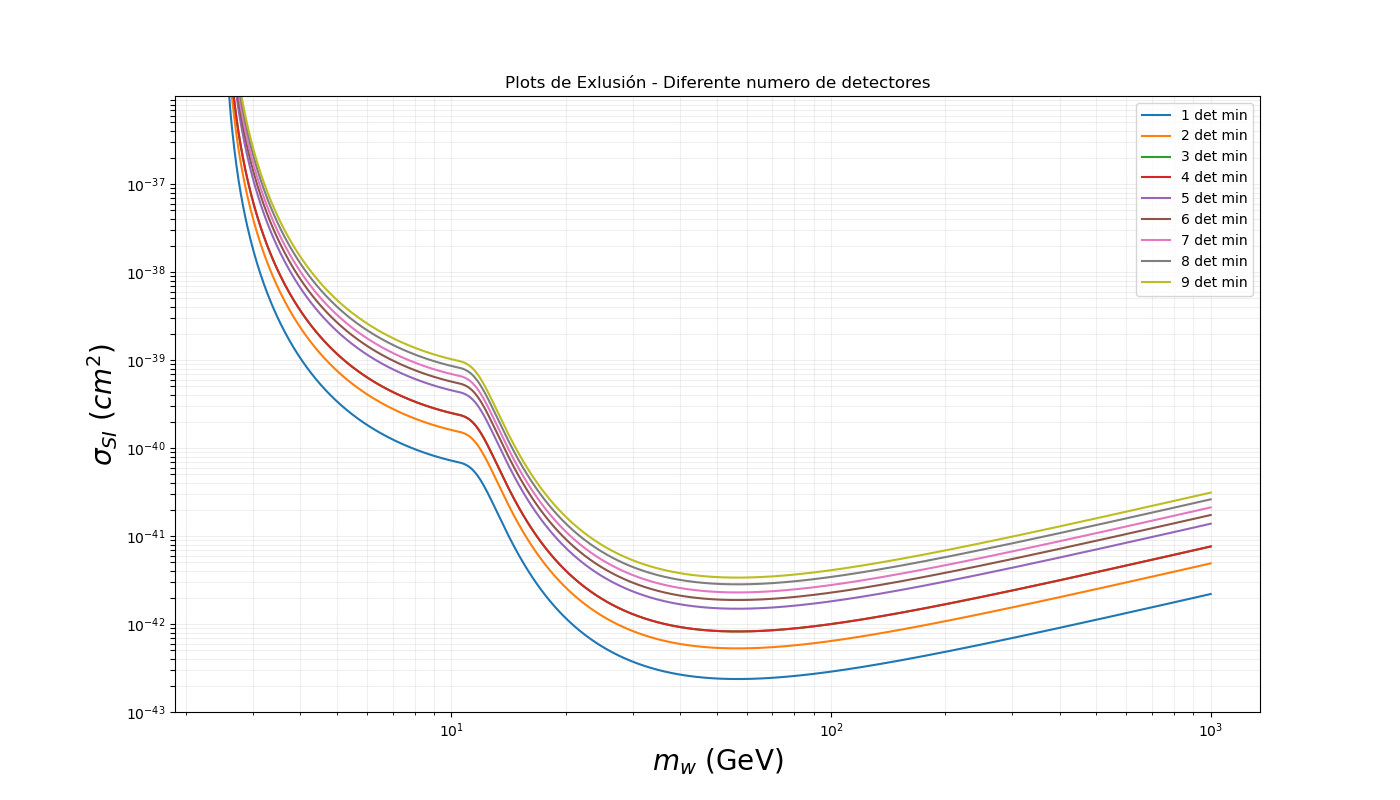

In [58]:
from matplotlib.ticker import LogLocator, LogFormatter
from matplotlib.ticker import FuncFormatter
timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.

mW_min=0.1 #masa wimp minima en GeV
mW_max=3

mWs=np.logspace(mW_min,mW_max,num=1000,endpoint=True)
plt.ion()
plt.figure(figsize=(14, 8))
ax = plt.subplot()

#Calculamos función Ritmo teorico


Ei=1
Ef=6

arr=np.zeros(9)
for j in range(9):
    arr[j]=datos_1detector[0,j]
print(arr)
tiempo_exposicion=calcula_t_exposicion(arr)
masa_exposicion=calcula_m_exposicion(arr)
ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
ax.plot(mWs,sigma_sis,ls='-',label="1 det min")

arr=np.zeros(9)
for j in range(9):
    arr[j]=datos_2detector[0,j]
print(arr)
tiempo_exposicion=calcula_t_exposicion(arr)
masa_exposicion=calcula_m_exposicion(arr)
ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
ax.plot(mWs,sigma_sis,ls='-',label="2 det min")

arr=np.zeros(9)
for j in range(9):
    arr[j]=datos_3detector[0,j]
print(arr)
tiempo_exposicion=calcula_t_exposicion(arr)
masa_exposicion=calcula_m_exposicion(arr)
ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
ax.plot(mWs,sigma_sis,ls='-',label="3 det min")

arr=np.zeros(9)
for j in range(9):
    arr[j]=datos_4detector[0,j]

print(arr)
tiempo_exposicion=calcula_t_exposicion(arr)
masa_exposicion=calcula_m_exposicion(arr)
ritmo_comp1=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr)
sigma_sis1=np.array([(ritmo_comp1/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
ax.plot(mWs,sigma_sis,ls='-',label="4 det min")


arr=np.zeros(9)
for j in range(9):
    arr[j]=datos_5detector[0,j]
print(arr)
tiempo_exposicion=calcula_t_exposicion(arr)
masa_exposicion=calcula_m_exposicion(arr)
ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
ax.plot(mWs,sigma_sis,ls='-',label="5 det min")

arr=np.zeros(9)
for j in range(9):
    arr[j]=datos_6detector[0,j]
print(arr)
tiempo_exposicion=calcula_t_exposicion(arr)
masa_exposicion=calcula_m_exposicion(arr)
ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
ax.plot(mWs,sigma_sis,ls='-',label="6 det min")

arr=np.zeros(9)
for j in range(9):
    arr[j]=datos_7detector[0,j]
print(arr)
tiempo_exposicion=calcula_t_exposicion(arr)
masa_exposicion=calcula_m_exposicion(arr)
ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
ax.plot(mWs,sigma_sis,ls='-',label="7 det min")

arr=np.zeros(9)
for j in range(9):
    arr[j]=datos_8detector[0,j]
print(arr)
tiempo_exposicion=calcula_t_exposicion(arr)
masa_exposicion=calcula_m_exposicion(arr)
ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
ax.plot(mWs,sigma_sis,ls='-',label="8 det min")

arr=np.zeros(9)
for j in range(9):
    arr[j]=datos_9detector[0,j]
print(arr)
tiempo_exposicion=calcula_t_exposicion(arr)
masa_exposicion=calcula_m_exposicion(arr)
ritmo_comp=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr)
sigma_sis=np.array([(ritmo_comp/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
ax.plot(mWs,sigma_sis,ls='-',label="9 det min")



ax.legend()
ax.set_title(r'Plots de Exlusión - Diferente numero de detectores')
ax.set_ylabel(r'$\sigma_{SI}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-36
y_inf=1e-43

ax.set_ylim(y_inf,y_sup)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)


[0. 0. 0. 0. 0. 0. 0. 0. 1.]
[1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 1.]


/tmp/ipykernel_43081/2714817706.py:28: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis1=np.array([(ritmo_comp1/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
/tmp/ipykernel_43081/2714817706.py:39: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis2=np.array([(ritmo_comp2/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
/tmp/ipykernel_43081/2714817706.py:51: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis1=np.array([(ritmo_comp1/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


[1. 1. 0. 0. 0. 0. 0. 0. 0.]


/tmp/ipykernel_43081/2714817706.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis2=np.array([(ritmo_comp2/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


[0. 0. 1. 0. 0. 0. 0. 1. 1.]


/tmp/ipykernel_43081/2714817706.py:75: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis1=np.array([(ritmo_comp1/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


[1. 1. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 1. 0. 0. 0. 1. 1. 1.]


/tmp/ipykernel_43081/2714817706.py:86: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis2=np.array([(ritmo_comp2/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
/tmp/ipykernel_43081/2714817706.py:101: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis1=np.array([(ritmo_comp1/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


[1. 1. 0. 1. 0. 1. 0. 0. 0.]


/tmp/ipykernel_43081/2714817706.py:112: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis2=np.array([(ritmo_comp2/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


[0. 0. 1. 0. 1. 0. 1. 1. 1.]


/tmp/ipykernel_43081/2714817706.py:125: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis1=np.array([(ritmo_comp1/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


[1. 1. 0. 1. 1. 1. 0. 0. 0.]
[0. 0. 1. 0. 1. 1. 1. 1. 1.]


/tmp/ipykernel_43081/2714817706.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis2=np.array([(ritmo_comp2/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])
/tmp/ipykernel_43081/2714817706.py:148: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis1=np.array([(ritmo_comp1/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


[1. 1. 0. 1. 1. 1. 1. 0. 0.]


/tmp/ipykernel_43081/2714817706.py:159: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis2=np.array([(ritmo_comp2/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


[0. 0. 1. 1. 1. 1. 1. 1. 1.]


/tmp/ipykernel_43081/2714817706.py:172: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis1=np.array([(ritmo_comp1/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


[1. 1. 1. 1. 1. 1. 1. 0. 0.]


/tmp/ipykernel_43081/2714817706.py:183: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis2=np.array([(ritmo_comp2/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


[0. 1. 1. 1. 1. 1. 1. 1. 1.]


/tmp/ipykernel_43081/2714817706.py:196: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis1=np.array([(ritmo_comp1/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


[1. 1. 1. 1. 1. 1. 1. 1. 0.]


/tmp/ipykernel_43081/2714817706.py:207: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis2=np.array([(ritmo_comp2/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


[1. 1. 1. 1. 1. 1. 1. 1. 1.]


/tmp/ipykernel_43081/2714817706.py:220: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis1=np.array([(ritmo_comp1/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


[1. 1. 1. 1. 1. 1. 1. 1. 1.]


/tmp/ipykernel_43081/2714817706.py:231: RuntimeWarning: divide by zero encountered in double_scalars
  sigma_sis2=np.array([(ritmo_comp2/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


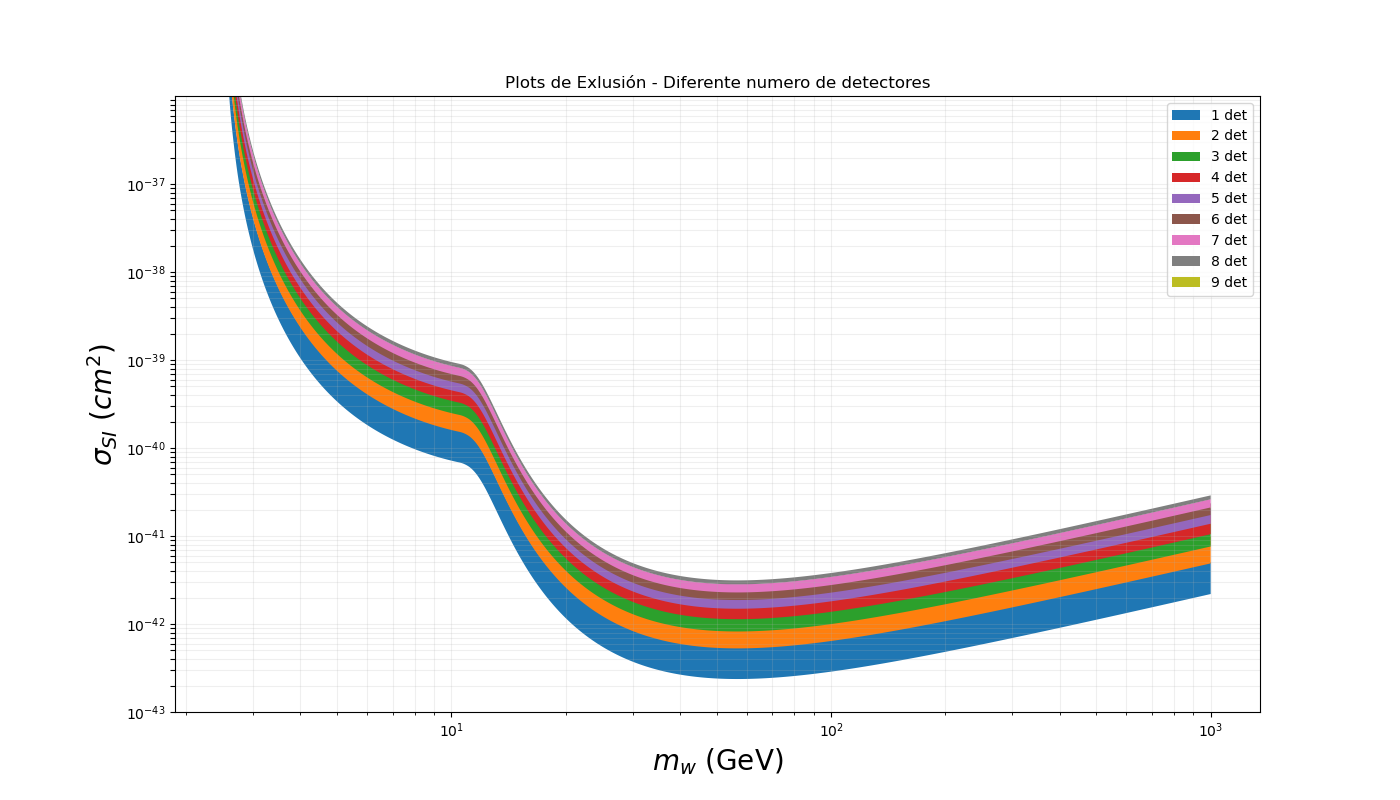

In [57]:
from matplotlib.ticker import LogLocator, LogFormatter
from matplotlib.ticker import FuncFormatter
timeMax=72.9 
timeMin=255.5 
timeAvg=(timeMax+timeMin)/2.

mW_min=0.1 #masa wimp minima en GeV
mW_max=3

mWs=np.logspace(mW_min,mW_max,num=1000,endpoint=True)
plt.ion()
plt.figure(figsize=(14, 8))
ax = plt.subplot()

#Calculamos función Ritmo teorico


Ei=1
Ef=6

arr=np.zeros(9)
for j in range(9):
    arr[j]=datos_1detector[0,j]
print(arr)
tiempo_exposicion=calcula_t_exposicion(arr)
masa_exposicion=calcula_m_exposicion(arr)
ritmo_comp1=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr)
sigma_sis1=np.array([(ritmo_comp1/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


arr2=np.zeros(9)
for j in range(9):
    arr2[j]=datos_1detector[(len(datos_1detector)-1),j]
print(arr2)

tiempo_exposicion=calcula_t_exposicion(arr2)
masa_exposicion=calcula_m_exposicion(arr2)
ritmo_comp2=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr2)
sigma_sis2=np.array([(ritmo_comp2/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])

ax.fill_between(mWs,sigma_sis1,sigma_sis2,label="1 det")


arr=np.zeros(9)
for j in range(9):
    arr[j]=datos_2detector[0,j]
print(arr)
tiempo_exposicion=calcula_t_exposicion(arr)
masa_exposicion=calcula_m_exposicion(arr)
ritmo_comp1=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr)
sigma_sis1=np.array([(ritmo_comp1/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


arr2=np.zeros(9)
for j in range(9):
    arr2[j]=datos_2detector[(len(datos_2detector)-1),j]
print(arr2)

tiempo_exposicion=calcula_t_exposicion(arr2)
masa_exposicion=calcula_m_exposicion(arr2)
ritmo_comp2=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr2)
sigma_sis2=np.array([(ritmo_comp2/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])

ax.fill_between(mWs,sigma_sis1,sigma_sis2,label="2 det")



arr=np.zeros(9)
for j in range(9):
    arr[j]=datos_3detector[0,j]
print(arr)
tiempo_exposicion=calcula_t_exposicion(arr)
masa_exposicion=calcula_m_exposicion(arr)
ritmo_comp1=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr)
sigma_sis1=np.array([(ritmo_comp1/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


arr2=np.zeros(9)
for j in range(9):
    arr2[j]=datos_3detector[(len(datos_3detector)-1),j]
print(arr2)

tiempo_exposicion=calcula_t_exposicion(arr2)
masa_exposicion=calcula_m_exposicion(arr2)
ritmo_comp2=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr2)
sigma_sis2=np.array([(ritmo_comp2/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])

ax.fill_between(mWs,sigma_sis1,sigma_sis2,label="3 det")





arr=np.zeros(9)
for j in range(9):
    arr[j]=datos_4detector[0,j]
print(arr)
tiempo_exposicion=calcula_t_exposicion(arr)
masa_exposicion=calcula_m_exposicion(arr)
ritmo_comp1=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr)
sigma_sis1=np.array([(ritmo_comp1/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


arr2=np.zeros(9)
for j in range(9):
    arr2[j]=datos_4detector[(len(datos_4detector)-1),j]
print(arr2)

tiempo_exposicion=calcula_t_exposicion(arr2)
masa_exposicion=calcula_m_exposicion(arr2)
ritmo_comp2=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr2)
sigma_sis2=np.array([(ritmo_comp2/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])

ax.fill_between(mWs,sigma_sis1,sigma_sis2,label="4 det")



arr=np.zeros(9)
for j in range(9):
    arr[j]=datos_5detector[0,j]
print(arr)
tiempo_exposicion=calcula_t_exposicion(arr)
masa_exposicion=calcula_m_exposicion(arr)
ritmo_comp1=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr)
sigma_sis1=np.array([(ritmo_comp1/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


arr2=np.zeros(9)
for j in range(9):
    arr2[j]=datos_5detector[(len(datos_5detector)-1),j]
print(arr2)

tiempo_exposicion=calcula_t_exposicion(arr2)
masa_exposicion=calcula_m_exposicion(arr2)
ritmo_comp2=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr2)
sigma_sis2=np.array([(ritmo_comp2/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])

ax.fill_between(mWs,sigma_sis1,sigma_sis2,label="5 det")


arr=np.zeros(9)
for j in range(9):
    arr[j]=datos_6detector[0,j]
print(arr)
tiempo_exposicion=calcula_t_exposicion(arr)
masa_exposicion=calcula_m_exposicion(arr)
ritmo_comp1=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr)
sigma_sis1=np.array([(ritmo_comp1/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


arr2=np.zeros(9)
for j in range(9):
    arr2[j]=datos_6detector[(len(datos_6detector)-1),j]
print(arr2)

tiempo_exposicion=calcula_t_exposicion(arr2)
masa_exposicion=calcula_m_exposicion(arr2)
ritmo_comp2=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr2)
sigma_sis2=np.array([(ritmo_comp2/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])

ax.fill_between(mWs,sigma_sis1,sigma_sis2,label="6 det")



arr=np.zeros(9)
for j in range(9):
    arr[j]=datos_7detector[0,j]
print(arr)
tiempo_exposicion=calcula_t_exposicion(arr)
masa_exposicion=calcula_m_exposicion(arr)
ritmo_comp1=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr)
sigma_sis1=np.array([(ritmo_comp1/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


arr2=np.zeros(9)
for j in range(9):
    arr2[j]=datos_7detector[(len(datos_7detector)-1),j]
print(arr2)

tiempo_exposicion=calcula_t_exposicion(arr2)
masa_exposicion=calcula_m_exposicion(arr2)
ritmo_comp2=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr2)
sigma_sis2=np.array([(ritmo_comp2/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])

ax.fill_between(mWs,sigma_sis1,sigma_sis2,label="7 det")



arr=np.zeros(9)
for j in range(9):
    arr[j]=datos_8detector[0,j]
print(arr)
tiempo_exposicion=calcula_t_exposicion(arr)
masa_exposicion=calcula_m_exposicion(arr)
ritmo_comp1=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr)
sigma_sis1=np.array([(ritmo_comp1/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


arr2=np.zeros(9)
for j in range(9):
    arr2[j]=datos_8detector[(len(datos_8detector)-1),j]
print(arr2)

tiempo_exposicion=calcula_t_exposicion(arr2)
masa_exposicion=calcula_m_exposicion(arr2)
ritmo_comp2=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr2)
sigma_sis2=np.array([(ritmo_comp2/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])

ax.fill_between(mWs,sigma_sis1,sigma_sis2,label="8 det")



arr=np.zeros(9)
for j in range(9):
    arr[j]=datos_9detector[0,j]
print(arr)
tiempo_exposicion=calcula_t_exposicion(arr)
masa_exposicion=calcula_m_exposicion(arr)
ritmo_comp1=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr)
sigma_sis1=np.array([(ritmo_comp1/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])


arr2=np.zeros(9)
for j in range(9):
    arr2[j]=datos_9detector[(len(datos_9detector)-1),j]
print(arr2)

tiempo_exposicion=calcula_t_exposicion(arr2)
masa_exposicion=calcula_m_exposicion(arr2)
ritmo_comp2=integral_exp(Ei,Ef,masa_exposicion,tiempo_exposicion,array_det=arr2)
sigma_sis2=np.array([(ritmo_comp2/(totalRate_NaI_ee_DAMA(Ei,Ef,timeAvg,a,1)*masa_exposicion*tiempo_exposicion/365)) for a in mWs])

ax.fill_between(mWs,sigma_sis1,sigma_sis2,label="9 det")


ax.legend()
ax.set_title(r'Plots de Exlusión - Diferente numero de detectores')
ax.set_ylabel(r'$\sigma_{SI}$ $(cm^2)$',fontsize=20)
ax.set_xlabel(r'$m_w$ (GeV)',fontsize=20)

ax.set_yscale("log")
ax.set_xscale("log")

y_sup=1e-36
y_inf=1e-43

ax.set_ylim(y_inf,y_sup)

exp_min = int(np.floor(np.log10(y_inf)))   
exp_max = int(np.ceil(np.log10(y_sup)))    
exps = np.arange(exp_min, exp_max)     


all_ticks = []
for e in exps:
    decade = (np.arange(1, 10) * (10.0**e)).tolist()
    all_ticks.extend(decade)
all_ticks = np.array(all_ticks)

ax.set_yticks(all_ticks)                    

ax.grid(which='both', linestyle='-', alpha=0.2)


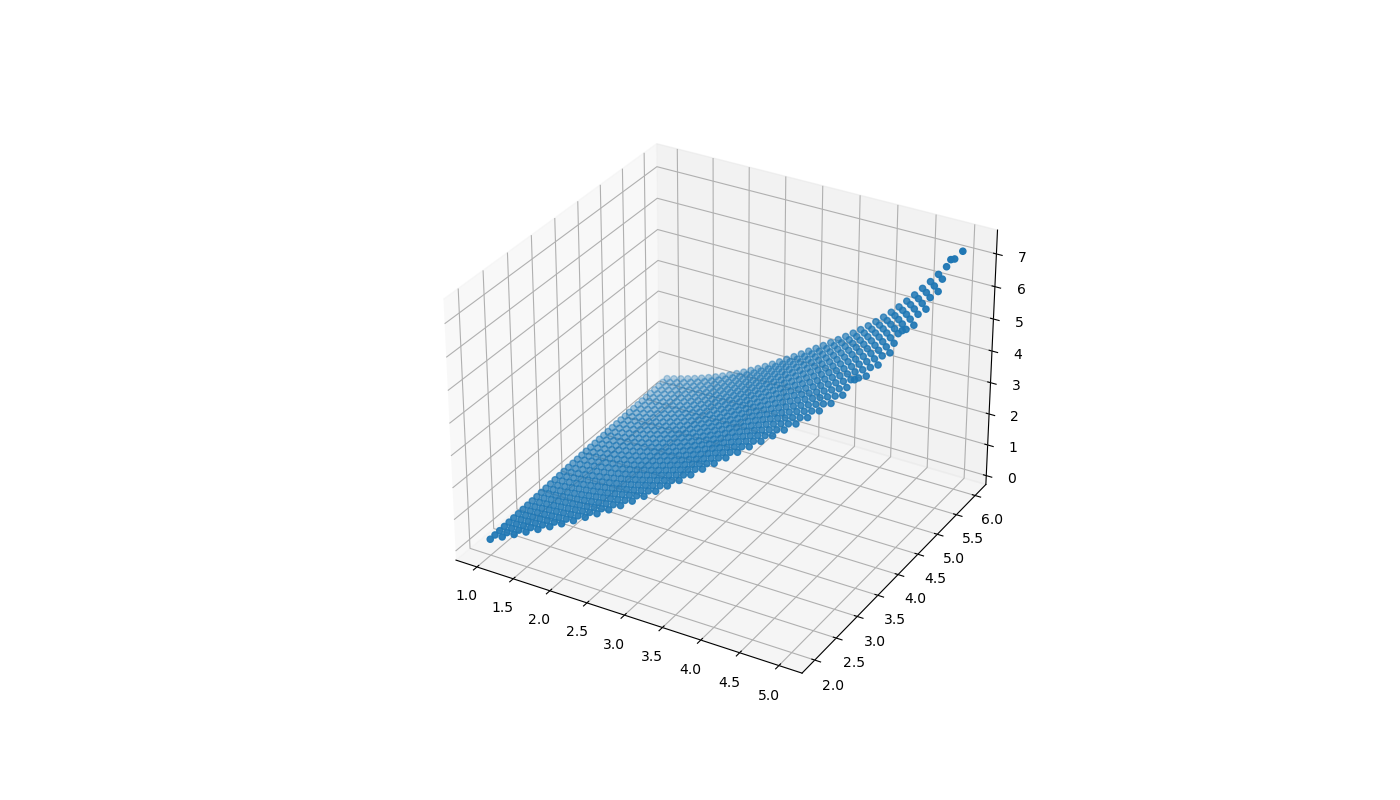

In [ ]:
import matplotlib.pyplot as plt
import random

array_ventanas=np.loadtxt("Datos/array_minimos_ventanas.txt",delimiter=";")
array_ventanas
array_ventanas2=array_ventanas.copy()
for i in range(len(array_ventanas2)):
    array_ventanas2[i][2]*=1e41
array_ventanas2=array_ventanas2.T

plt.figure(figsize=(14, 8))

ax = plt.axes(projection='3d')
ax.scatter3D(array_ventanas2[0],array_ventanas2[1],array_ventanas2[2])
plt.show()